In [1]:
import os 

import random
import scipy.io as sio
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
pos_torque_zones = [x for x in range(0, 150, 1)]
pos_speed_zones = [x for x in range(0, 100, 1)]
neg_speed_zones = [x for x in range(-100, 0, 1)]
time = [x for x in range(0, 25, 1)]

In [235]:
# reference_torque.sort()
# reference_speed.sort()

In [246]:
for i in range(10):
    torque_points = [0] + random.choices(pos_torque_zones, k=len(time)//2)
    speed_points = [0] + random.choices(pos_speed_zones, k=len(time)//2)
    reference_torque = []
    for tp in torque_points:
        reference_torque.append(tp)
        reference_torque.append(tp)
    
    reference_speed = []
    for sp in speed_points:
        reference_speed.append(sp)
        reference_speed.append(sp)
        
    reference_torque_act = np.asarray(reference_torque[:-1]) * 25 / 100.
    reference_speed_rad = np.asarray(reference_speed[:-1]) * 2 * np.pi
    
    sio.savemat('../../../datasets/benchmark/sim_random/Exp_' + str(i) + '.mat', {'Speed': reference_speed_rad, 'Kvalv': reference_torque_act, 't': time})
    
for i in range(10,20):
    torque_points = [0] + random.choices(pos_torque_zones, k=len(time)//2)
    speed_points = [0] + random.choices(neg_speed_zones, k=len(time)//2)
    reference_torque = []
    for tp in torque_points:
        reference_torque.append(tp)
        reference_torque.append(tp)
    
    reference_speed = []
    for sp in speed_points:
        reference_speed.append(sp)
        reference_speed.append(sp)
        
    reference_torque_act = np.asarray(reference_torque[:-1]) * 25 / 100.
    reference_speed_rad = np.asarray(reference_speed[:-1]) * 2 * np.pi
    print (reference_speed_rad.min())
    sio.savemat('../../../datasets/benchmark/sim_random/Exp_' + str(i) + '.mat', {'Speed': reference_speed_rad, 'Kvalv': reference_torque_act, 't': time})
    
# for i in range(500,750):
#     reference_torque = [0] + random.choices(neg_torque_zones, k=len(time)-1)
#     reference_speed = [0] + random.choices(neg_speed_zones, k=len(time)-1)
#     reference_torque_act = np.asarray(reference_torque) * 25 / 100.
#     reference_speed_rad = np.asarray(reference_speed) * 2 * np.pi
#     sio.savemat('../../../datasets/benchmark/sim_random/Exp_' + str(i) + '.mat', {'Speed': reference_speed_rad, 'Kvalv': reference_torque_act, 't': time})
    
# for i in range(750,1000):
#     reference_torque = [0] + random.choices(neg_torque_zones, k=len(time)-1)
#     reference_speed = [0] + random.choices(pos_speed_zones, k=len(time)-1)
#     reference_torque_act = np.asarray(reference_torque) * 25 / 100.
#     reference_speed_rad = np.asarray(reference_speed) * 2 * np.pi
#     sio.savemat('../../../datasets/benchmark/sim_random/Exp_' + str(i) + '.mat', {'Speed': reference_speed_rad, 'Kvalv': reference_torque_act, 't': time})

-622.0353454107791
-622.0353454107791
-596.9026041820607
-622.0353454107791
-534.0707511102648
-458.6725274241098
-628.3185307179587
-615.7521601035994
-622.0353454107791
-596.9026041820607


In [2]:
#Static benchmark

In [54]:
constant_speeds = [10, 20, 30, 50, 75, 100, -10, -20, -30, -50, -75, -100] #Hz
constant_loads = [10, 20, 30, 50, 75, 100, 120, 150] #Per unit of nominal torque

In [55]:
#constant speeds under no load

In [56]:
for speed in constant_speeds:
    ref_speed = [0] + [speed, speed]
    ref_torque = [0] + [0, 0]
    time = [0] + [1, 24]
    reference_torque_act = np.asarray(ref_torque) * 25 / 100.
    reference_speed_rad = np.asarray(ref_speed) * 2 * np.pi
    sio.savemat('../../../datasets/benchmark/sim_static/Exp_constant_speed_' + str(speed) + '_zero_load.mat', {'Speed': reference_speed_rad, 'Kvalv': reference_torque_act, 't': time})
    
#     plt.plot(ref_speed, ref_torque)
#     plt.xlabel('Speed (rad/s)')
#     plt.ylabel('Torque Load p.u.')
#     plt.show()

In [57]:
#constant load under zero speed

In [58]:
for load in constant_loads:
    ref_speed = [0] + [0, 0]
    ref_torque = [0] + [load, load]
    time = [0] + [1, 25]
    reference_torque_act = np.asarray(ref_torque) * 25 / 100.
    reference_speed_rad = np.asarray(ref_speed) * 2 * np.pi
    sio.savemat('../../../datasets/benchmark/sim_static/Exp_constant_load_' + str(load) + '_zero_speed.mat', {'Speed': reference_speed_rad, 'Kvalv': reference_torque_act, 't': time})
#     plt.plot(ref_speed, ref_torque)
#     plt.xlabel('Speed (rad/s)')
#     plt.ylabel('Torque Load p.u.')
#     plt.show()

In [59]:
#constant load under constant speed

In [60]:
for speed in constant_speeds:
    for load in constant_loads:
        ref_speed = [0] + [speed, speed]
        ref_torque = [0] + [load, load]
        time = [0] + [1, 25]
        reference_torque_act = np.asarray(ref_torque) * 25 / 100.
        reference_speed_rad = np.asarray(ref_speed) * 2 * np.pi
        sio.savemat('../../../datasets/benchmark/sim_static/Exp_constant_load_' + str(load) + '_constant_speed_' + str(speed) + '.mat', {'Speed': reference_speed_rad, 'Kvalv': reference_torque_act, 't': time})
#         plt.plot(ref_speed, ref_torque)
#         plt.xlabel('Speed (rad/s)')
#         plt.ylabel('Torque Load p.u.')
#         plt.show()

In [17]:
#Dynamic benchmark

In [211]:
np.set_printoptions(precision=2, suppress=True)
acc_deltas = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 1]#acceleration deltas
constant_speeds = [10, 20, 30, 50, 75, 100, -10, -20, -30, -50, -75, -100] #Hz
constant_loads = [10, 20, 30, 50, 75, 100, 120, 150] #Per unit of nominal torque

In [212]:
#Speed step zero load

In [213]:
for constant_speed in constant_speeds:
    time = [0, 5, 5.0001, 10]
    ref_speed = [0, 0, constant_speed, constant_speed]
    ref_torque = [0, 0, 0, 0]
    reference_torque_act = np.asarray(ref_torque) * 25 / 100.
    reference_speed_rad = np.asarray(ref_speed) * 2 * np.pi
    sio.savemat('../../../datasets/benchmark/sim_dynamic/Exp_step_speed_' + str(constant_speed) + '_load_0.mat', {'Speed': reference_speed_rad, 'Kvalv': reference_torque_act, 't': time})
    os.mkdir('../../../datasets/benchmark/sim_dynamic_output/Exp_step_speed_' + str(constant_speed) + '_load_0')

In [214]:
#Speed step nominal load

In [215]:
for constant_speed in constant_speeds:
    for constant_load in constant_loads:
        time = [0, 5, 5.0001, 10]
        ref_speed = [0, 0, constant_speed, constant_speed]
        ref_torque = [constant_load, constant_load, constant_load, constant_load]
        reference_torque_act = np.asarray(ref_torque) * 25 / 100.
        reference_speed_rad = np.asarray(ref_speed) * 2 * np.pi
        sio.savemat('../../../datasets/benchmark/sim_dynamic/Exp_step_speed_' + str(constant_speed) + '_nominal_load_' + str(constant_load) + '.mat', {'Speed': reference_speed_rad, 'Kvalv': reference_torque_act, 't': time})
        os.mkdir('../../../datasets/benchmark/sim_dynamic_output/Exp_step_speed_' + str(constant_speed) + '_nominal_load_' + str(constant_load) )

In [216]:
#Ramp speed zero load

In [217]:
for acc_delta in acc_deltas:
    for constant_speed in constant_speeds:
        time = [0, 5, 5 + acc_delta, 10]
        ref_speed = [0, 0, constant_speed, constant_speed]
        ref_torque = [0, 0, 0, 0]
        reference_torque_act = np.asarray(ref_torque) * 25 / 100.
        reference_speed_rad = np.asarray(ref_speed) * 2 * np.pi
        sio.savemat('../../../datasets/benchmark/sim_dynamic/Exp_ramp_speed_' + str(constant_speed) + '_load_0_acc_delta_' + str(acc_delta) +'.mat', {'Speed': reference_speed_rad, 'Kvalv': reference_torque_act, 't': time})
        os.mkdir('../../../datasets/benchmark/sim_dynamic_output/Exp_ramp_speed_' + str(constant_speed) + '_load_0_acc_delta_' + str(acc_delta))

In [218]:
#Ramp speed nominal load

In [219]:
for acc_delta in acc_deltas:
    for constant_speed in constant_speeds:
        for constant_load in constant_loads:
            time = [0, 5, 5+acc_delta, 10]
            ref_speed = [0, 0, constant_speed, constant_speed]
            ref_torque = [constant_load, constant_load, constant_load, constant_load]
            reference_torque_act = np.asarray(ref_torque) * 25/ 100.
            reference_speed_rad = np.asarray(ref_speed) * 2 * np.pi
            sio.savemat('../../../datasets/benchmark/sim_dynamic/Exp_ramp_speed_' + str(constant_speed) + '_nominal_load_' + str(constant_load) + '_acc_delta_' + str(acc_delta) + '.mat', {'Speed': reference_speed_rad, 'Kvalv': reference_torque_act, 't': time})
            os.mkdir('../../../datasets/benchmark/sim_dynamic_output/Exp_ramp_speed_' + str(constant_speed) + '_nominal_load_' + str(constant_load) + '_acc_delta_' + str(acc_delta))

In [220]:
#Constant speed torque step

In [221]:
for constant_speed in constant_speeds:
    for constant_load in constant_loads:
        time = [0, 5, 5.0001, 10]
        ref_speed = [constant_speed, constant_speed, constant_speed, constant_speed]
        ref_torque = [0, 0, constant_load, constant_load]
        reference_torque_act = np.asarray(ref_torque) * 25 / 100.
        reference_speed_rad = np.asarray(ref_speed) * 2 * np.pi
        sio.savemat('../../../datasets/benchmark/sim_dynamic/Exp_constant_speed_' + str(constant_speed) + '_step_load_' + str(constant_load) + '.mat', {'Speed': reference_speed_rad, 'Kvalv': reference_torque_act, 't': time})
        os.mkdir('../../../datasets/benchmark/sim_dynamic_output/Exp_constant_speed_' + str(constant_speed) + '_step_load_' + str(constant_load))

In [222]:
#Constant speed torque ramp

In [223]:
for acc_delta in acc_deltas:
    for constant_speed in constant_speeds:
        for constant_load in constant_loads:
            time = [0, 5, 5+acc_delta, 10]
            ref_speed = [constant_speed, constant_speed, constant_speed, constant_speed]
            ref_torque = [0, 0, constant_load, constant_load]
            reference_torque_act = np.asarray(ref_torque) * 25 / 100.
            reference_speed_rad = np.asarray(ref_speed) * 2 * np.pi
            sio.savemat('../../../datasets/benchmark/sim_dynamic/Exp_constant_speed_' + str(constant_speed) + '_ramp_load_' + str(constant_load) + '_acc_delta_' + str(acc_delta) + '.mat', {'Speed': reference_speed_rad, 'Kvalv': reference_torque_act, 't': time})
            os.mkdir('../../../datasets/benchmark/sim_dynamic_output/Exp_constant_speed_' + str(constant_speed) + '_ramp_load_' + str(constant_load) + '_acc_delta_' + str(acc_delta))

In [4]:
torque_points = [0] + random.choices(pos_torque_zones, k=len(time)//2)
speed_points = [0] + random.choices(pos_speed_zones, k=len(time)//2)
reference_torque = []
for tp in torque_points:
    reference_torque.append(tp)
    reference_torque.append(tp)

reference_speed = []
for sp in speed_points:
    reference_speed.append(sp)
    reference_speed.append(sp)

ta = np.asarray(reference_torque[:-1]) * 25 / 100.
sr = np.asarray(reference_speed[:-1]) * 2 * np.pi

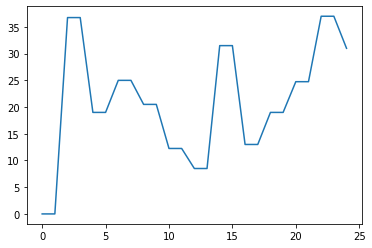

In [5]:
plt.plot(time, ta)

In [26]:
nt = np.arange(0,24+1/4000,1/4000)

In [27]:
nta = np.interp(nt, time, ta)

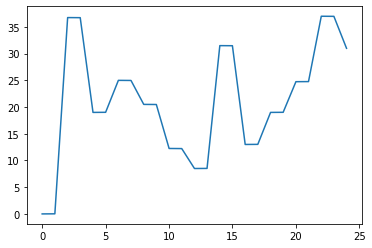

In [28]:
plt.plot(nt, nta)